In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from numpy.linalg import eig, inv

import math

In [ ]:
# this is for algorithm 1
def fit_ellipse_general(sp):
    # from assignment 3
    # fit the model for the given points:  
    #      x[0]xx + x[1]xy + x[2]yy + x[3]x + x[4]y = 1
    
    n=len(sp)
    A = np.zeros((n, 5))
    b = np.ones((n))
    for i in range(n):
        pt = sp[i]
        A[i, :] = [pt[0]*pt[0], pt[0]*pt[1], pt[1]*pt[1], pt[0], pt[1]]
        
    x = np.linalg.lstsq(A, b, rcond=None)[0]
    return x


# this is for algorithm 1
def translation(x) :
    # do the translation for general_to_standard
    # input x means
    #      x[0] xx + x[1] xy + x[2] yy + x[3]x + x[4] y = 1
    # for the general model
    # output xp means
    #     xp = [a, b, c, z, w]
    # for the semi-standard model
    # a(x-z)(x-z) + b(x-z)(y-w) + c(y-w)(y-w) = 1


    #
    # TODO: complete this part and replace the return values
    #

    # -----------nico----------------

    # Untuk cari Center (z,w) 
    A = np.array([[-2*x[0]  , -x[1]  ],
                  [-x[1]    , -2*x[2]]])
    
    B = np.array([x[3],x[4]])

    array_center = np.linalg.solve(A, B)
    z = array_center[0]
    w = array_center[1]

    # Untuk cari Coef (a', b', c')
    a = np.array([[z*z + (1/x[0]),  z*w         , w*w        ], 
                  [    z*z       ,  z*w + 1/x[1], w*w        ],
                  [    z*z       ,  z*w         , w*w + 1/x[2]]])
    b = np.array([1,1,1])

    # a', b', c' = [ 0.00141895 -0.00106666  0.00127449]
    hasil = np.linalg.solve(a, b)

    xp = np.array([hasil[0], hasil[1], hasil[2], z, w])

    # ----------- nico ---------------

    return xp

    # return np.array([0.00141895161, -0.00106665618, 0.00127449289, 46.2251570, 59.9276681])

# this is for algorithm 1
def rotation(xp):
    # Compute the rotation for general_to_standard
    # The input model is
    #        xp[0]xx+xp[1]xy+xp[2]yy = 1
    # find the rotation matrix that make it 
    #       xx/alpha^{2}  + yy/beta^{2} = 1
    #
    # returns 
    # U : rotation matrix
    # P : [alpha, beta], where alpha and beta are the parameters 
    #     for the standard model
    # 
    # TODO: conplete this function and replace the return values

    # ----------- nico ---------------
    A = np.array([[xp[0]  , xp[1]/2],
                  [xp[1]/2, xp[2]  ]])
    
    (eigen_val, eigen_vec) = eig(A)
    Q = eigen_vec.T 

    QTAQ = Q.T @ A @ Q

    # Rotation Matrix is Q
    U = Q
    alpha = math.sqrt(1/QTAQ[0,0])
    beta = math.sqrt(1/QTAQ[1,1])

    # ----------- nico ---------------

    # U = np.array([[ 0.75306248,  -0.65794901],
    #              [0.65794901,  0.75306248]])
    # alpha = 35.16844663129803
    # beta  = 23.03316576651734
    return U, alpha, beta

#ini yang salah 
def bigToSmall(a, b, U) :
    ret = U
    rotation = np.array([[0, -1], [1, 0]])
 
    if a > b :
        ret = U.T
    else :
        ret = U.T.dot(rotation)
    return max(a, b), min(a, b), ret

# this is for algorithm 1
def general_to_standard(x):
    # general form is 
    #     x[0] xx + x[1] xy + x[2] yy + x[3]x + x[4] y = 1
    # standard form 
    #     xx/alpha^{2}  + yy/beta^{2} = 1
    # 
    # input x is a list containing 5 elements
    # returns
    #     center: center of the translation
    #     U     : rotation matrix
    #     alpha, beta: coefficients for the standard form
    
    xp = translation(x)
    U, alpha, beta = rotation(xp)
    center = xp[3:5]
    return center, U, alpha, beta

In [ ]:

# this is for algorithm2
def PCA(points):
    # Input are data in 2D
    # return the PCA for the given data
    #     means: center of the data
    #         U: rotation matrix for data point
    #        YR: the points after translation and rotation
    #   
    n = len(points)
    X = np.zeros((n,2))
    for i in range(n):
        X[i,:] = points[i]

    # do the translation
    means = np.mean(X, axis= 0)
    Y = np.zeros((n,2))
    Y[:,0] = [x - means[0] for x in X[:,0]]
    Y[:,1] = [x - means[1] for x in X[:,1]]

    Q = 0
    W = 0
    E = 0
    R = 0

    for i in range(n):
      Q += Y[i,0] * Y[i,0]
      W += Y[i,0] * Y[i,1]
      E += Y[i,1] * Y[i,0]
      R += Y[i,1] * Y[i,1]

      
    S = np.array([[Q, W], [E, R]] )  
    T = S/n
    print('hihi:',T)
    


      


    # do the rotation
    # compute the covariance matrix Sigma
    #
    # TODO: find the rotation matrix U and replace it with the current values
    #

    U = np.array([[-0.73960154, -0.67304499], [ 0.67304499, -0.73960154]])
    YR = np.dot(U, Y.T)

    return means, U.T, YR

# this is for algorithm 2
def fit_ellipse_standard(X):
    # X: the points 
    # output: alpha, beta are the model of the standard form
    #       xx/alpha^2 + yy/alpha^2 = 1
    # 
    # Use least square method to fit the parameter alpha and beta.
    # 
    m, n = X.shape
    A = np.zeros((n, 2))
    b = np.ones((n))
    for i in range(n):
        A[i, :] = [X[0,i]*X[0,i], X[1,i]*X[1,i]]
    
    coef = np.linalg.lstsq(A, b, rcond=None)[0]
    alpha = math.sqrt(1/coef[0])
    beta  = math.sqrt(1/coef[1])
    return alpha, beta

# this is for algorithm 2
def standard_to_general(means, U, alpha, beta):
    # convert 
    #         xx/alpha^2 + yy/beta^2 = 1
    # to      a xx + bxy + cyy + dx + ey = 1
    # using rotation matrix U and translation means
    # return:
    #     coef = [a, b, c, d, e]
    # 
    # TODO: complete this code and replace the return values

    alpha, beta, U = bigToSmall(alpha, beta, U)
       
    return np.array([-0.0003901231267804706, 0.00038080859394188987, -0.0004260863980737427, 0.01480319696571577, 0.03235806929940388])

In [ ]:
# this is for both algorithms
def ellipse_info(center, U, alpha, beta):
    # returns 2x6 matrix C
    # 1. C[:,0:2]: the coordinates of two focal point, 
    # 2. C[:,2:4]: the coordinates of two end points of major axis
    # 3. C[:,4:6]: the coordinates of two end points of minor axis

    C = np.zeros((2,6))
    # for some reason, the x and y in center should be exchanged
    center = np.array([center[1], center[0]])
    alpha, beta, U = bigToSmall(alpha, beta, U)
    gamma = math.sqrt(alpha*alpha-beta*beta)
    C[:, 0] = center+gamma*U[:,1]
    C[:, 1] = center-gamma*U[:,1]
    C[:, 2] = center+alpha*U[:,1]
    C[:, 3] = center-alpha*U[:,1]
    C[:, 4] = center+beta *U[:,0]
    C[:, 5] = center-beta *U[:,0]
    return C


# this is for both algorithms
def draw_ellipse(x, center, U, alpha, beta):
    # plot the drawing and the fitted circle
    # the ellipse must be in the form
    #      x[0]xx + x[1]xy + x[2]yy + x[3]x + x[4]y = 1
    x_axis = np.linspace(0, 100, 500)
    y_axis = np.linspace(0, 100, 500)

    a, b = np.meshgrid(x_axis, y_axis)

    C = x[0]*a*a + x[1]*a*b + x[2]*b*b + x[3]*a + x[4]*b - 1

    print("=============================")
    print(center, alpha, beta)
    p = ellipse_info(center, U, alpha, beta)

    print('Focal points: (', p[0,0],',', p[1,0],'),(',p[0,1],',', p[1,1],')')
    print('Major axis: (', U[0,0],',',U[1,0], ')')
    print('Minor axis: (', U[0,1],',',U[1,1], ')')

    # start the plotting
    figure, axes = plt.subplots(1)
    plt.imshow(im1) 
    axes.contour(b, a, C, [0])
    axes.set_aspect(1)

    # plot focal points
    plt.plot(p[0,0], p[1,0], 'bo', p[0,1], p[1,1], 'bo')
    # plot major-axis
    plt.plot([p[0,2], p[0,3]], [p[1,2], p[1,3]], 'r-')
    # plot minor-axis
    plt.plot([p[0,4], p[0,5]], [p[1,4], p[1,5]], 'g-')

    plt.show()
    # If you want to save the result comparition image, uncomment this line
    # plt.savefig(file)

def algorithm1(points):
    # solve the least square problem
    x = fit_ellipse_general(points)

    # do the rotation
    center, U, alpha, beta = general_to_standard(x)

    # draw ellipse
    print('Algorithm 1')
    draw_ellipse(x, center, U, alpha, beta)
    
def algorithm2(points):
    # use PCA to find the center (means), the rotation matrix U, 
    # and the points after translation and rotation Y
    center, U, Y = PCA(points)
    
    # use least square to find the parameters of the standard form
    alpha, beta = fit_ellipse_standard(Y)
    
    # find the general form for drawing
    # x containts the coefficients of the general form
    x = standard_to_general(center, U, alpha, beta)
    
    # draw ellipse
    print('Algorithm 2')
    draw_ellipse(x, center, U, alpha, beta)

def draw_template(x, center, U, alpha, beta):
    x_axis = np.linspace(0, 100, 500)
    y_axis = np.linspace(0, 100, 500)

    a, b = np.meshgrid(x_axis, y_axis)

    C = x[0]*a*a + x[1]*a*b + x[2]*b*b + x[3]*a + x[4]*b - 1

    p = ellipse_info(center, U, alpha, beta)

    return a, b, C, p


def compare(points) :
    # Algorithm 1
    # solve the least square problem
    x1 = fit_ellipse_general(points)

    # do the rotation
    center1, U1, alpha1, beta1 = general_to_standard(x1)

    a1, b1, C1, p1 = draw_template(x1, center1, U1, alpha1, beta1)


    # Algorithm 2
    center2, U2, Y2 = PCA(points)
    
    # use least square to find the parameters of the standard form
    alpha2, beta2 = fit_ellipse_standard(Y2)
    
    # find the general form for drawing
    # x containts the coefficients of the general form
    x2 = standard_to_general(center2, U2, alpha2, beta2)
    a2, b2, C2, p2 = draw_template(x2, center1, U1, alpha1, beta1)


    figure, axes = plt.subplots(1)
    plt.imshow(im1) 
    cs = axes.contour(b1, a1, C1, [0], colors='red')
    cs.collections[0].set_label('Algorithm 1')
    axes.set_aspect(1)

    cs = axes.contour(b2, a2, C2, [0], colors='blue')
    cs.collections[0].set_label('Algorithm 2')
    axes.set_aspect(1)
    plt.legend(loc='upper left')
    plt.show()

    # If you want to save the result comparition image, uncomment this line
    # plt.savefig(file)

In [ ]:
# Mount your google drive to save your gif result.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Algorithm 1
[45.75482871 44.83778521] 35.50416456721735 18.2915492088224
Focal points: ( 43.028023945343 , 15.379021009945042 ),( 46.64754647467529 , 76.13063640648227 )
Major axis: ( -0.9982298804851232 , -0.05947357149740133 )
Minor axis: ( 0.05947357149740133 , -0.9982298804851232 )


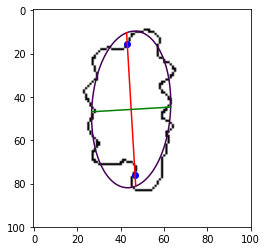

Algorithm 2
[46.2962963  45.56481481] 30.958744106399685 28.402592073217132
Focal points: ( 37.274151661115845 , 37.185780168545286 ),( 53.85547796851379 , 55.40681242404731 )
Major axis: ( -0.73960154 , -0.67304499 )
Minor axis: ( 0.67304499 , -0.73960154 )


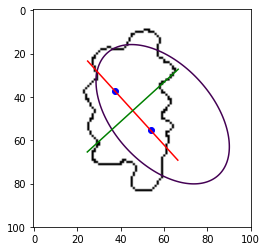

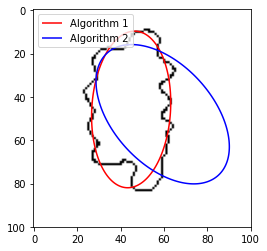

In [ ]:
#----------------main------------------
# read image and get circle points
# a 100x100 image 
im1 = img.imread('/content/drive/MyDrive/LA 4/ellipse-3.png')
[h, w, c] = np.array(im1).shape
points = [];
for i in range(h):
    for j in range(w):
        if (all(im1[i,j,:])==0):
            points.append([i, j])

algorithm1(points)
algorithm2(points)
compare(points)